## TITLE:Diabetes Prediction Using Single Neuron Classification


## Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')





## Read Data

In [2]:
path="/content/drive/MyDrive/DL=SUKAMAL DAS/GRADIENT DESCENT/diabetes.csv"
df=pd.read_csv(path)

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Data Inspection


In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.shape

(768, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [8]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

## Checking missing values

In [9]:
 df.isna().sum().sort_values(ascending=False)


Outcome                     0
Age                         0
DiabetesPedigreeFunction    0
BMI                         0
Insulin                     0
SkinThickness               0
BloodPressure               0
Glucose                     0
Pregnancies                 0
dtype: int64

In [10]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# No missing values, data is clean now.


# Checking Outliers


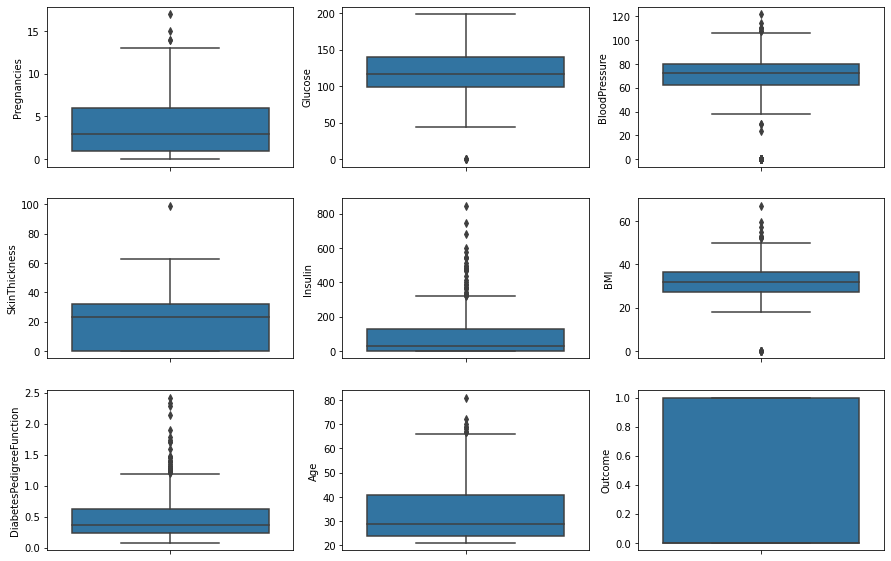

In [11]:
i = 1
plt.figure(figsize=(15,10))
for x in df.columns:
 plt.subplot(3,3,i)
 sns.boxplot(y=df[x])
 #plt.show()
 i+=1


## Create X and Y

In [12]:
X=df.drop(labels="Outcome",axis=1)

In [13]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [14]:
y=df["Outcome"]

In [15]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

# Scaling

In [16]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)
X=scaler.transform(X) 
print(X)


[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


# Split Data

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
random_state=10)

## Single Neuron Model Building


In [18]:
X.shape

(768, 8)

In [19]:

import tensorflow as tf
model = tf.keras.Sequential([tf.keras.layers.Dense(1,input_dim=8,activation='sigmoid') ])


In [20]:
model.compile(optimizer='SGD',loss='binary_crossentropy')


# Train

In [21]:
X_train.shape

(537, 8)

In [22]:
trained_model = model.fit(X_train,y_train,epochs=200,batch_size=5)


Epoch 1/200
108/108 [==============================] - 0s 1ms/step - loss: 0.7736
Epoch 2/200
108/108 [==============================] - 0s 1ms/step - loss: 0.6385
Epoch 3/200
108/108 [==============================] - 0s 1ms/step - loss: 0.5626
Epoch 4/200
108/108 [==============================] - 0s 1ms/step - loss: 0.5212
Epoch 5/200
108/108 [==============================] - 0s 1ms/step - loss: 0.4978
Epoch 6/200
108/108 [==============================] - 0s 1ms/step - loss: 0.4852
Epoch 7/200
108/108 [==============================] - 0s 1ms/step - loss: 0.4775
Epoch 8/200
108/108 [==============================] - 0s 1ms/step - loss: 0.4722
Epoch 9/200
108/108 [==============================] - 0s 1ms/step - loss: 0.4691
Epoch 10/200
108/108 [==============================] - 0s 1ms/step - loss: 0.4671
Epoch 11/200
108/108 [==============================] - 0s 1ms/step - loss: 0.4653
Epoch 12/200
108/108 [==============================] - 0s 989us/step - loss: 0.4642
Epoch 13/20

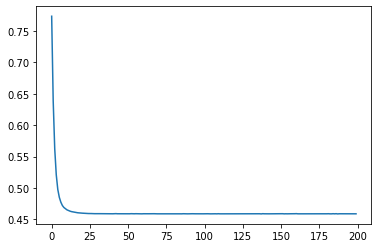

In [23]:
plt.plot(trained_model.history['loss'])


## Predict


In [30]:
 y_pred=model.predict(X_test)


In [31]:
y_pred

array([[0.54114556],
       [0.20599052],
       [0.48343763],
       [0.08588651],
       [0.08970559],
       [0.04141015],
       [0.07644242],
       [0.30823833],
       [0.05865476],
       [0.3458112 ],
       [0.06368166],
       [0.21322697],
       [0.92628515],
       [0.31454757],
       [0.1039224 ],
       [0.6892975 ],
       [0.7483045 ],
       [0.04022035],
       [0.0904513 ],
       [0.9355658 ],
       [0.3142483 ],
       [0.46546832],
       [0.36256802],
       [0.22758478],
       [0.15606505],
       [0.67870057],
       [0.3147047 ],
       [0.0116075 ],
       [0.6881143 ],
       [0.8377259 ],
       [0.21592116],
       [0.03606552],
       [0.06205785],
       [0.15718272],
       [0.4393468 ],
       [0.10725266],
       [0.33905667],
       [0.24529561],
       [0.76692784],
       [0.05235702],
       [0.38025072],
       [0.24082953],
       [0.48658326],
       [0.31171784],
       [0.442844  ],
       [0.11052081],
       [0.507248  ],
       [0.090